# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

#### If the dataset is present on Google Drive

In [ ]:
# If the datast is present on Google Drive
from google.colab import drive
drive.mount('/content/drive')
path_to_folder = [PATH TO FOLDER HERE]
data = pd.read_csv(path_to_folder + 'foodhub_order.csv')

#### If the dataset is present in your working directory

In [ ]:
data = pd.read_csv('foodhub_order.csv')

#### Rest of this section

In [5]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
print('Number of rows:', data.shape[0])
print('Number of columns:', data.shape[1])

Number of rows: 1898
Number of columns: 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

> I notice that restaurant_name, cuisine_type, day_of_the_week, and rating are of type object when they could be of specific types (ex: string for the restaurant_name, cuisine_type, and day_of_the_week, and int or float for rating.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:

> No missing values in this data, which is surprising. I could also tell from the first cell printed for Question 2 since it showed there were 1898 rows and all of the columns showed 1898 non-null entries.

> However, given my observation of not necessarily optimal types in Question 2, I will treat this


In [9]:
pd.unique(data.restaurant_name)

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

> Here, I think the issue where it's being treated as dtype=object is coming from the unusual characters in some names, such as at the end of 'Big Wong's Restaurant'

In [10]:
temp_df = data['restaurant_name']
types = [type(x) for x in temp_df]
pd.Series(types).value_counts()

,count
<class 'str'>,1898


> From here, since this returns 1898 entries of type str, I think it is okay to convert the restaurant_name column in our data to type str

In [11]:
# Convert the data['restaurant_name'] column to type str
data['restaurant_name'] = data['restaurant_name'].astype(str)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


> Okay, so the restaurant_name is still of type str. I asked Gemini and it's because Pandas often uses the object dtype dtype to store string data, but that the astype(str) conversion still ensures all values in the column are treated as strings.

> As such, I'll leave this for the other supposed string columns, but I'll check rating since that might need to be a numerical value

In [12]:
temp_df = data['rating']
types = [type(x) for x in temp_df]
print(pd.Series(types).value_counts())

print(temp_df.unique())
print(temp_df.value_counts())

<class 'str'>    1898
Name: count, dtype: int64
['Not given' '5' '3' '4']
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


> Okay, so the reason 'rating' is an object is because some of the values are 'not given'. The value_counts show that 'Not given' occurs more than any rating value in the dataset, so we can't just drop these rows. Rather, in a real model-building project, we might just have to drop this column from the dataset (since imputing with the mode for these categories could give significantly misleading information)

> However, in this case, since we're not building a model, I'll keep the rating category and a separate dataframe where the rating is not null

In [13]:
# Create a copy of the data where it has actual ratings, so I can quickly reference all of the data or just the valid rating data
if 'data_with_ratings' not in globals(): # good practice so I can easily get the value of this before any future modifications to the data
  data_with_ratings = data[data['rating'] != 'Not given'].copy()
  data_with_ratings['rating'] = pd.to_numeric(data_with_ratings['rating'])


print(data_with_ratings.shape)
display(data_with_ratings.info())

(1162, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


None

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [14]:
# Write your code here
data.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

> For food_preparation_time, the minimum is 20 minutes (units given in the dataset description), the average is 27.371970 minutes, and the maximum is 35 minutes

> On a separate note, by the definition of an outlier as `<Q1-1.5*IQR` or `>Q3+1.5*IQR`, I can observe that none of the numerical columns have any outlier values. I can also confirm this when using the definition of an outlier as at least 3 standard deviations from the mean


### **Question 5:** How many orders are not rated? [1 mark]

In [15]:
# Write the code here
print('Number of orders not rated:', data['rating'].value_counts()['Not given'])

Number of orders not rated: 736


#### Observations:

> 736 orders not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

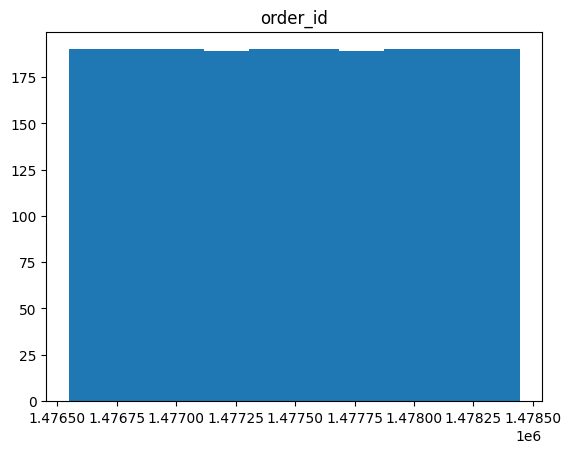

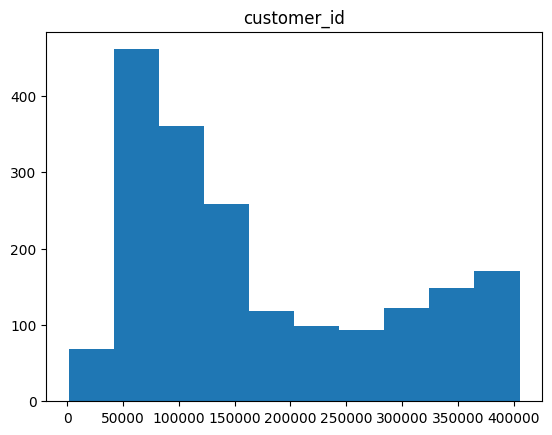

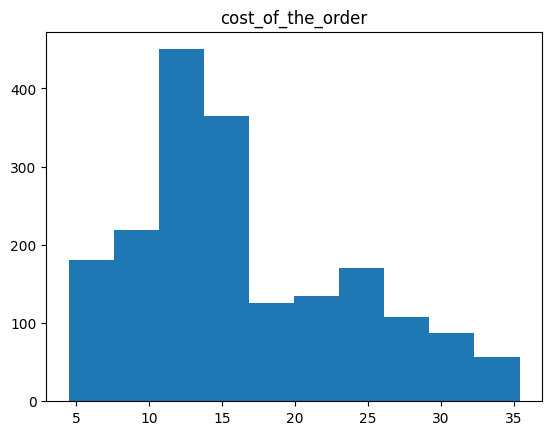

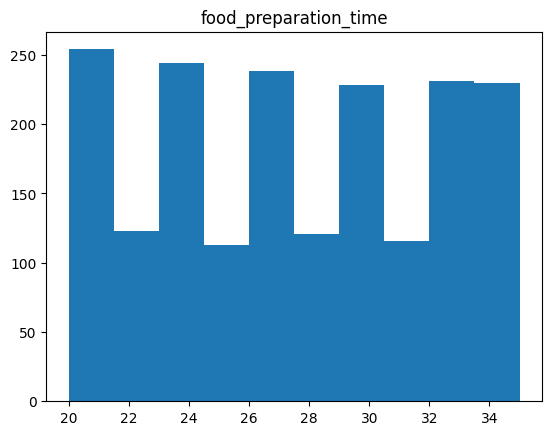

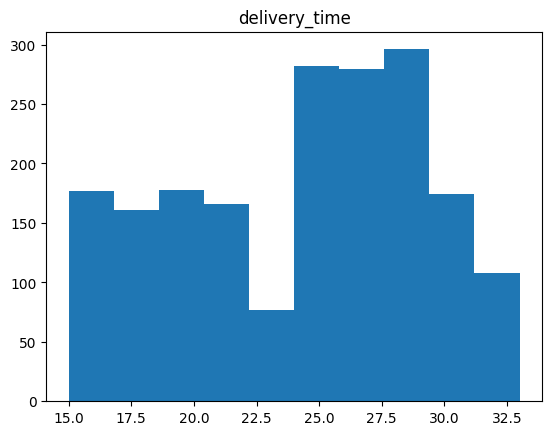

In [16]:
# Write the code here

# Histograms (numerical)
for col in data.columns:
  if data[col].dtype in ['int64', 'float64']:
    plt.hist(data[col])
    plt.title(col)
    plt.show()

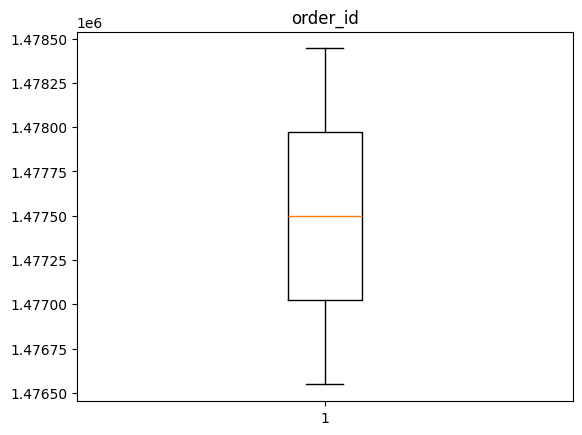

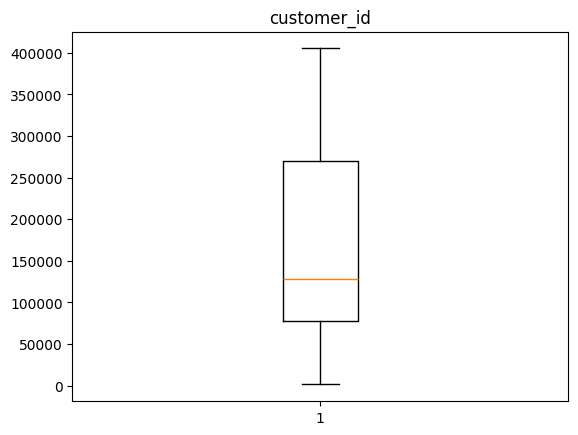

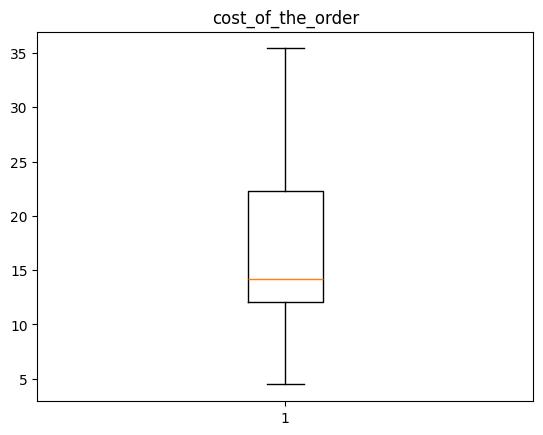

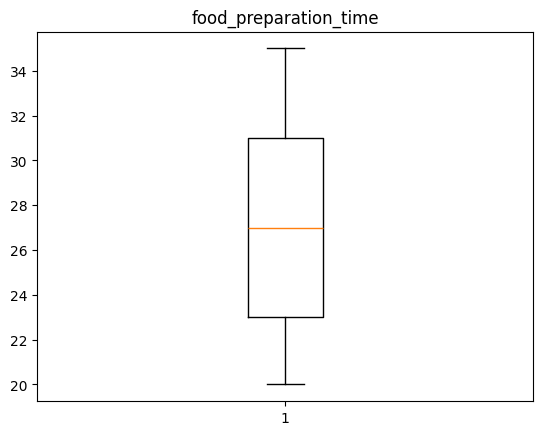

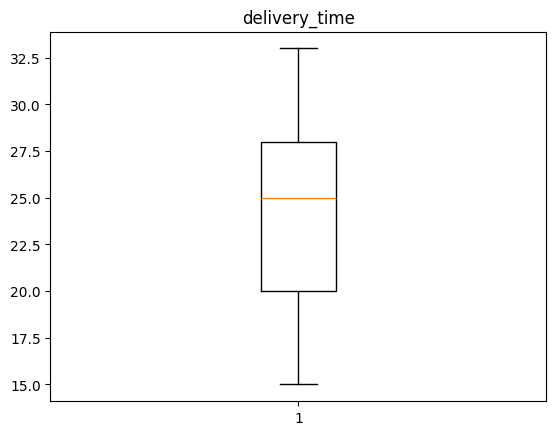

In [17]:
# Boxplots
for col in data.columns:
  if data[col].dtype in ['int64', 'float64']:
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


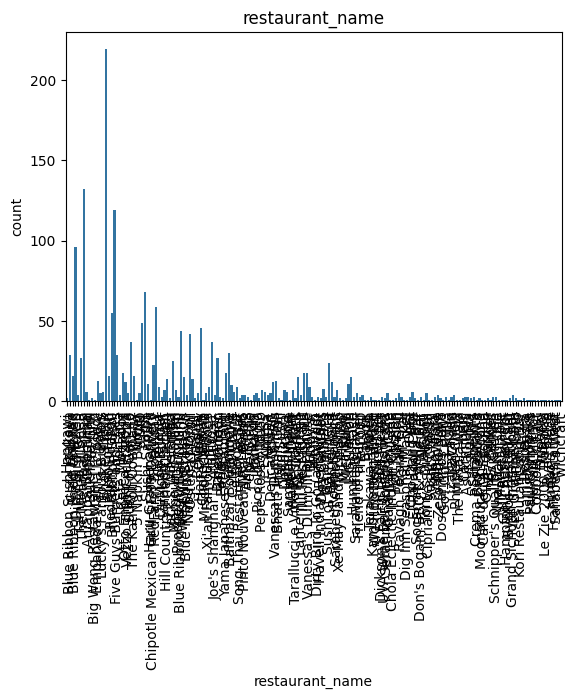

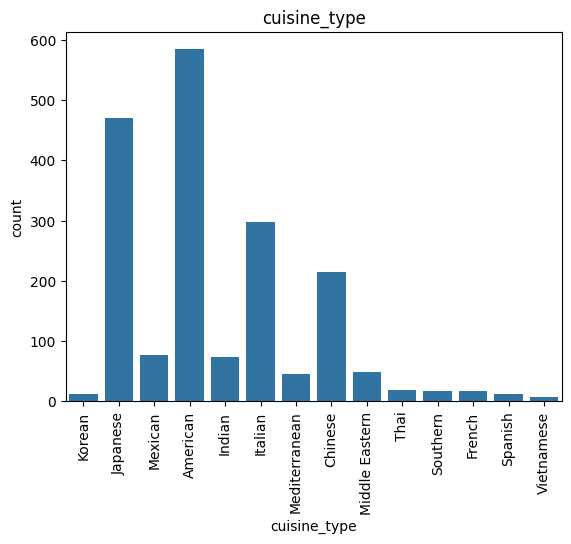

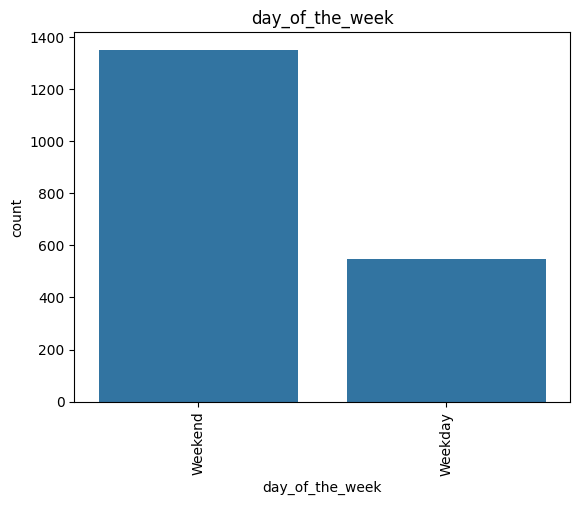

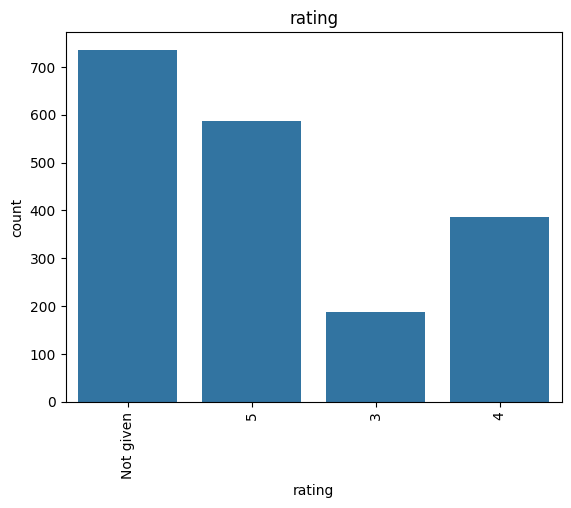

In [18]:
# Countplots (categorical)
for col in data.columns:
  if data[col].dtype == 'object':
    sns.countplot(data=data, x=col)
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()

#### Histogram and boxplot observations
> The order_id is further confirmed to be sequential by the almost if not exactly symmetrical box plot

> The customer_id is generally shown to be on the lower end from the histogram. The boxplot confirms this, as the median is shown to be on the lower end and the lower whisker is shorter than the upper whisker.

> The order cost is generally on the lower end by the same logic I used with the customer_id

> The food preparation time has a near-symmetrical boxplot but a slightly shorter whisker on the lower side (shorter time) than the upper side (longer time), and this shows that the food preparation time is slightly skewed in favor of shorter times. The histogram confirms this, but also shows that there are repeating small time intervals that have fewer orders, and this may be due to rounding from the people who gave the food preparation time data.

> The delivery time seems to usually be on the higher end of the range given the high median value, but the whiskers seem to be of similar length. This makes sense, given our histograms showed that the values are clustered in groups outside the range of approximately 22 to 24 minutes and that more orders were on the higher end of delivery times

#### Countplot observations
> The count of orders among different restaurants varied widely, showing that some restaurants were more/less popular than others.

> The cuisine_type plot showed that certain cuisines were much more popular than others. In this case, the 4 most popular cuisine types (in order starting from the most popular) were American, Japanese, Italian, and Chinese, and the other cuisine types were all significantly less popular

> Around 2x the orders were made on weekends as on weekdays

> Like we saw before, most people did not give ratings on the orders, but for those who did, most of them gave a rating of 5, the next most frequent rating was 4, and the least frequent rating was 3

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
# Write the code here
data['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Rye House,1
Hiroko's Place,1
Frank Restaurant,1


In [20]:
# Get the number of restaurants with 1 order, less than 5 orders, and less than 10 orders
print('Number of restaurants with 1 order:', (data['restaurant_name'].value_counts() == 1).sum())
print('Number of restaurants with less than 5 orders:', (data['restaurant_name'].value_counts() < 5).sum())
print('Number of restaurants with less than 10 orders:', (data['restaurant_name'].value_counts() < 10).sum())

Number of restaurants with 1 order: 50
Number of restaurants with less than 5 orders: 109
Number of restaurants with less than 10 orders: 137


#### Observations:

> The top 5 restaurants in terms of number of orders received are: Shake Shack (219 orders received), The Meatball Shop (132 orders received), Blue Ribbon Sushi (119 orders received), Blue Ribbon Fried Chicken (96 orders received), and Parm (68 orders received)

> On a separate note, I also found that there were 50 of the 178 restaurants with only 1 order, 109 with fewer than 5 orders, and 137 with fewer than 10 orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# Write the code here
data[data['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Middle Eastern,32
Mediterranean,32
Thai,15


In [22]:
data[data['day_of_the_week'] == 'Weekday']['cuisine_type'].value_counts()

,count
cuisine_type,
American,169
Japanese,135
Italian,91
Chinese,52
Mexican,24
Indian,24
Middle Eastern,17
Mediterranean,14
Southern,6


In [37]:
# Number of orders on weekends
print('Number of orders on weekends:', data[data['day_of_the_week'] == 'Weekend'].shape[0])
print('Number of orders on weekdays:', data[data['day_of_the_week'] == 'Weekday'].shape[0])

Number of orders on weekends: 1351
Number of orders on weekdays: 547


#### Observations:

> **American cuisine is most popular on weekends**

> American cuisine is also most popular on weekdays

> 1351 orders were on weekends, which is nearly 2.5x the 547 orders on weekdays,

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [36]:
# Write the code here
print('Percentage of orders cost more than 20 dollars:', f"{100*data[data['cost_of_the_order'] > 20].shape[0] / data.shape[0]}%")
print('Percentage of orders cost more than 25 dollars:', f"{100*data[data['cost_of_the_order'] > 25].shape[0] / data.shape[0]}%")

Percentage of orders cost more than 20 dollars: 29.24130663856691%
Percentage of orders cost more than 25 dollars: 16.0695468914647%


#### Observations:

> **Around 29.24% of orders cost more than \$20**

> Around 16.07% of orders cost more than \$25


### **Question 10**: What is the mean order delivery time? [1 mark]

In [24]:
# Write the code here
print('Mean order delivery time:', data['delivery_time'].mean())

Mean order delivery time: 24.161749209694417


#### Observations:

> The mean order delivery time is around 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [25]:
# Write the code here
data['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:

> The most frequent customer had customer_id 52832 with 13 orders; the 2nd most frequent customer had customer_id 47440 with 10 orders; and the third most frequent customer had customer_id 83287 with 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


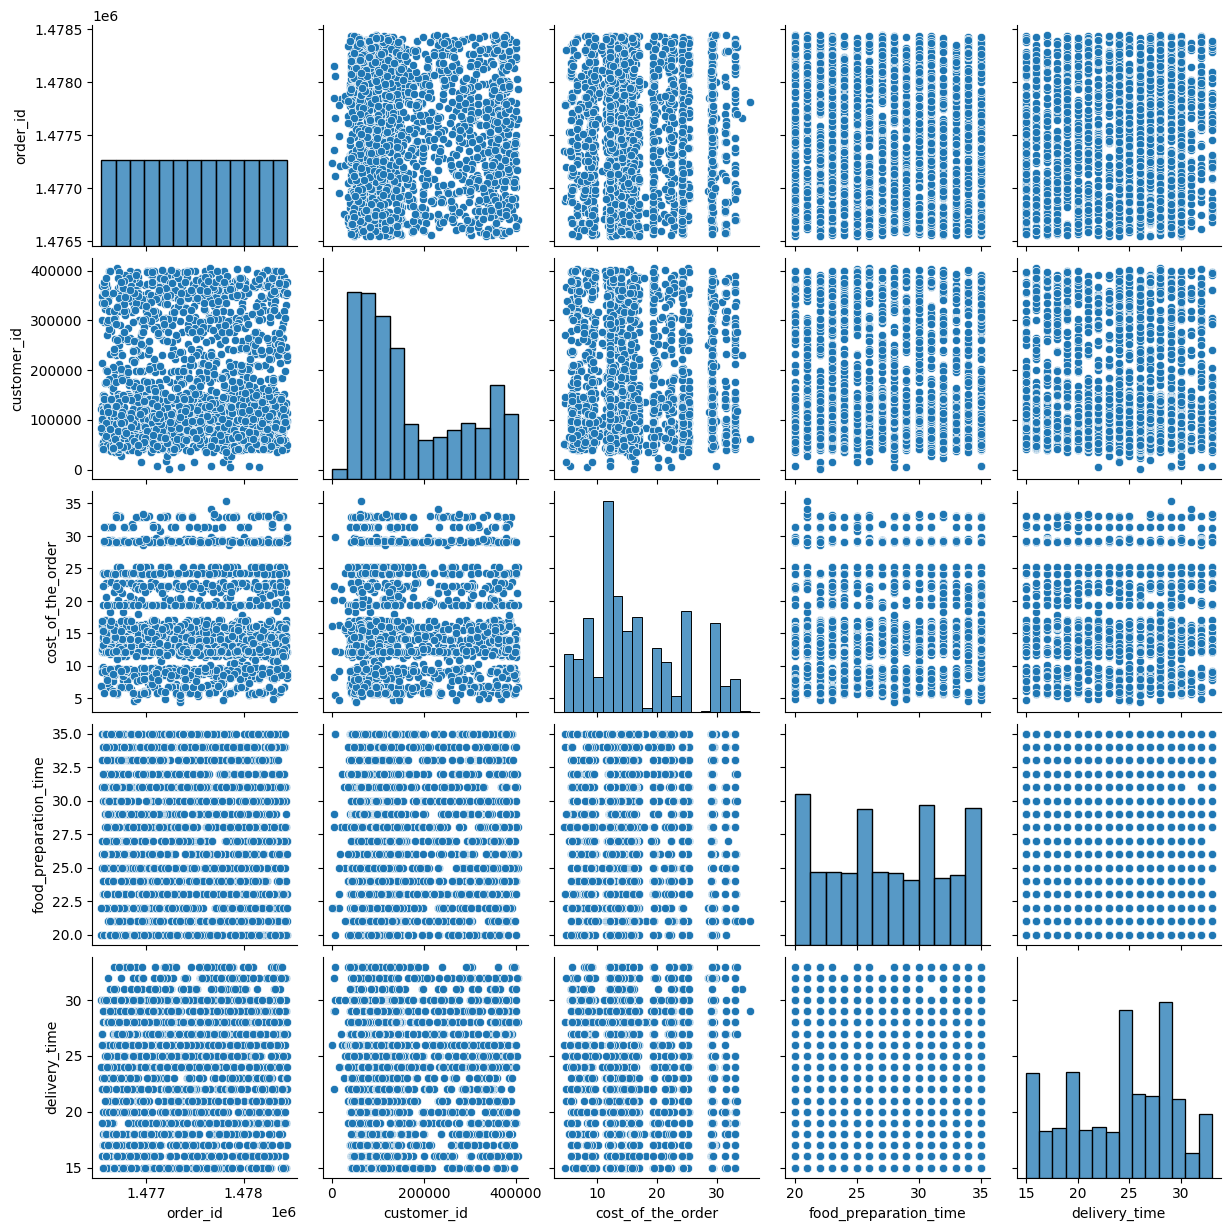

In [26]:
# Pairplot for numerical variables
numerical_cols = data.select_dtypes(include=np.number).columns
sns.pairplot(data[numerical_cols])

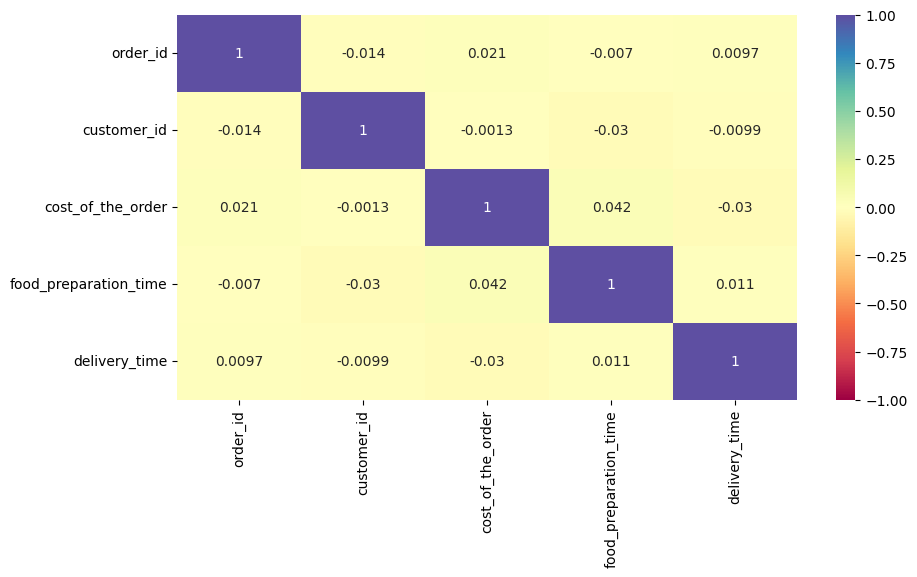

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

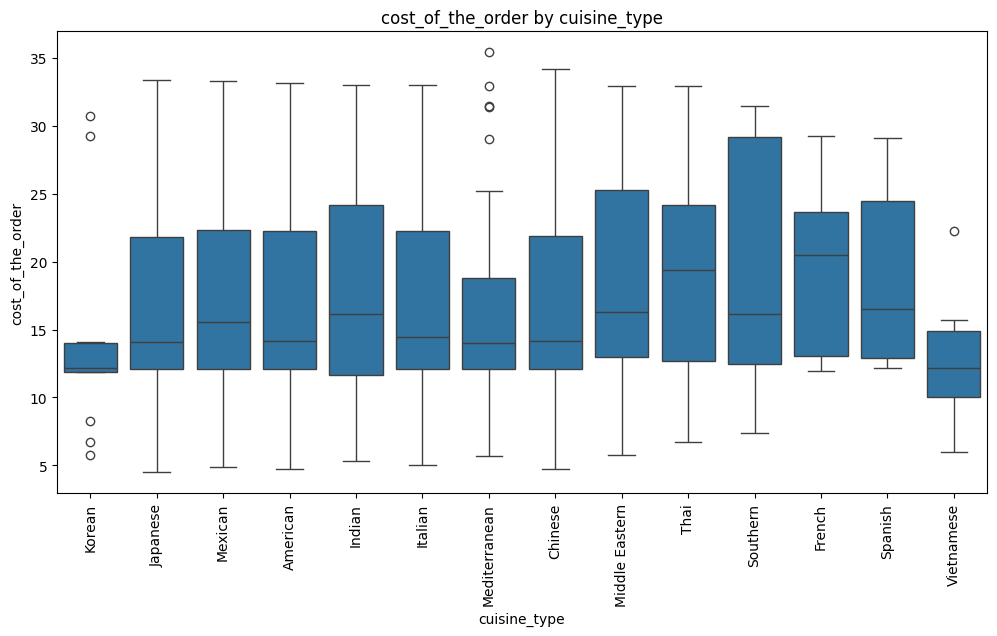

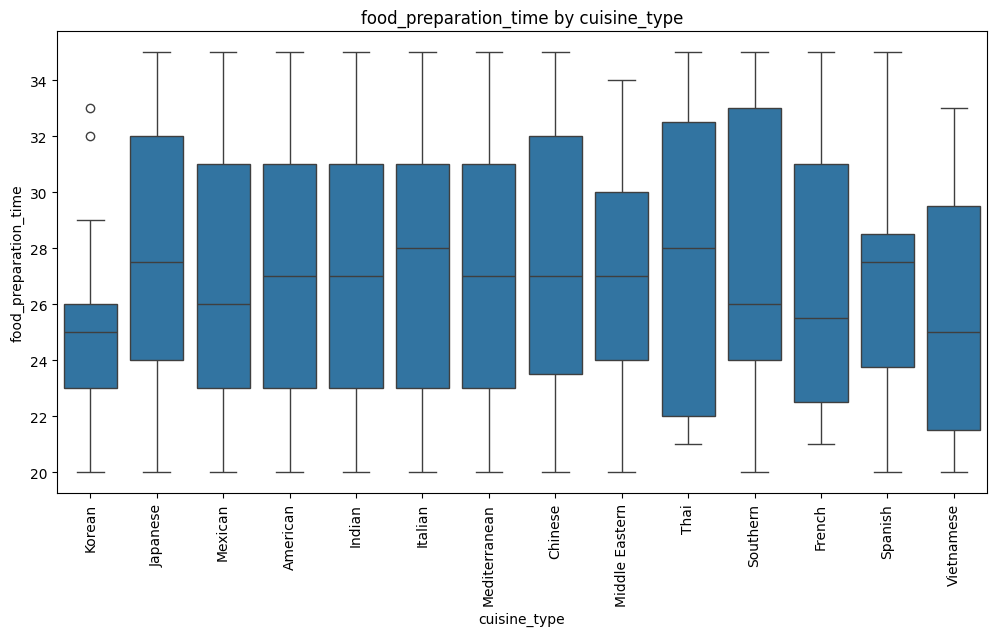

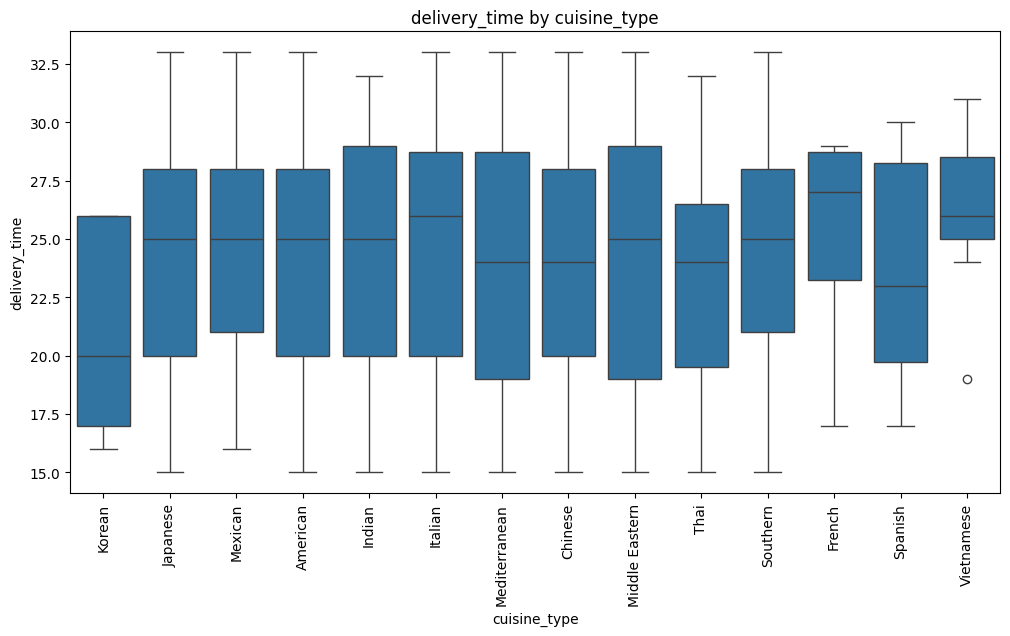

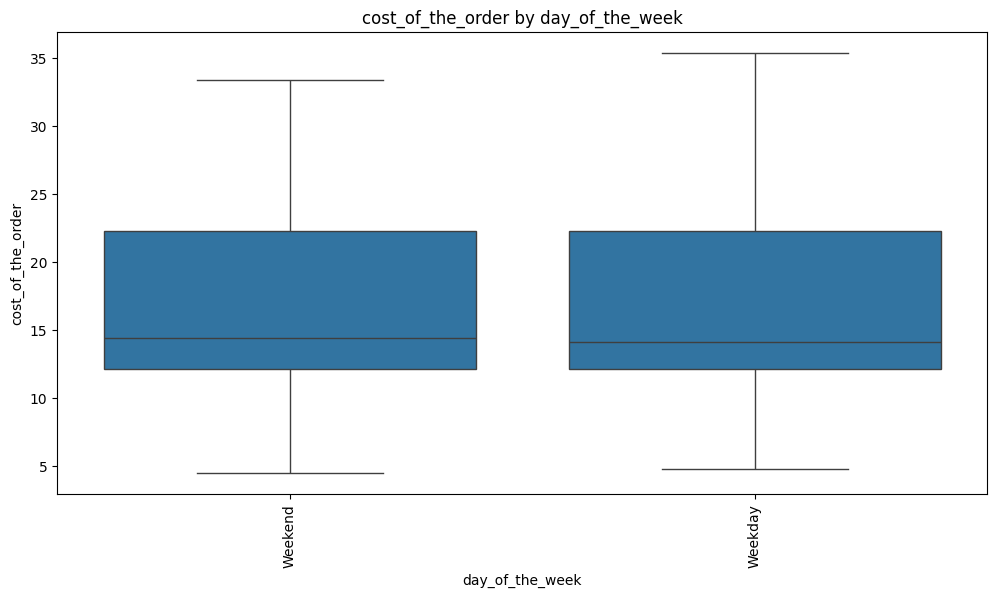

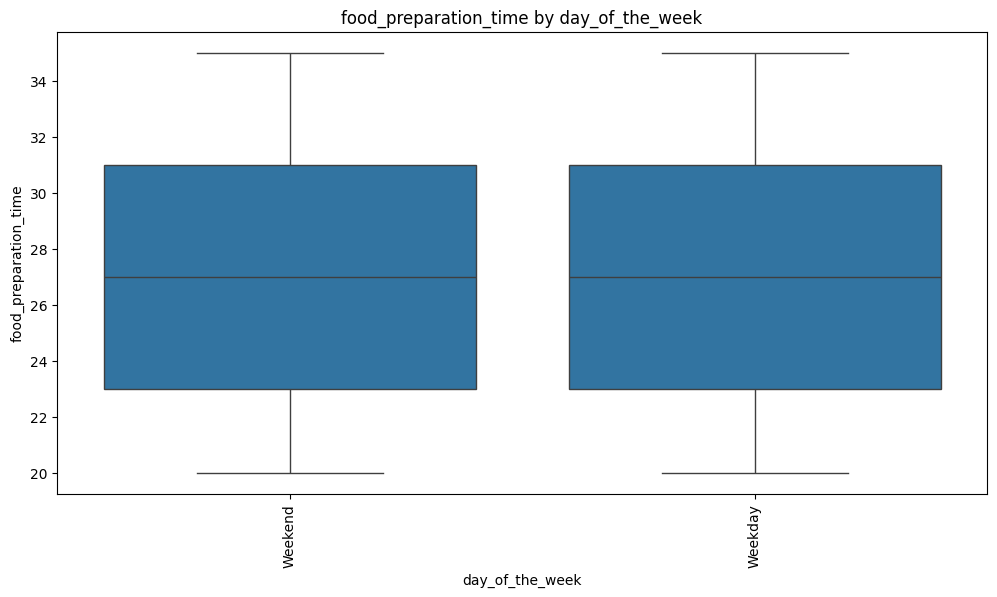

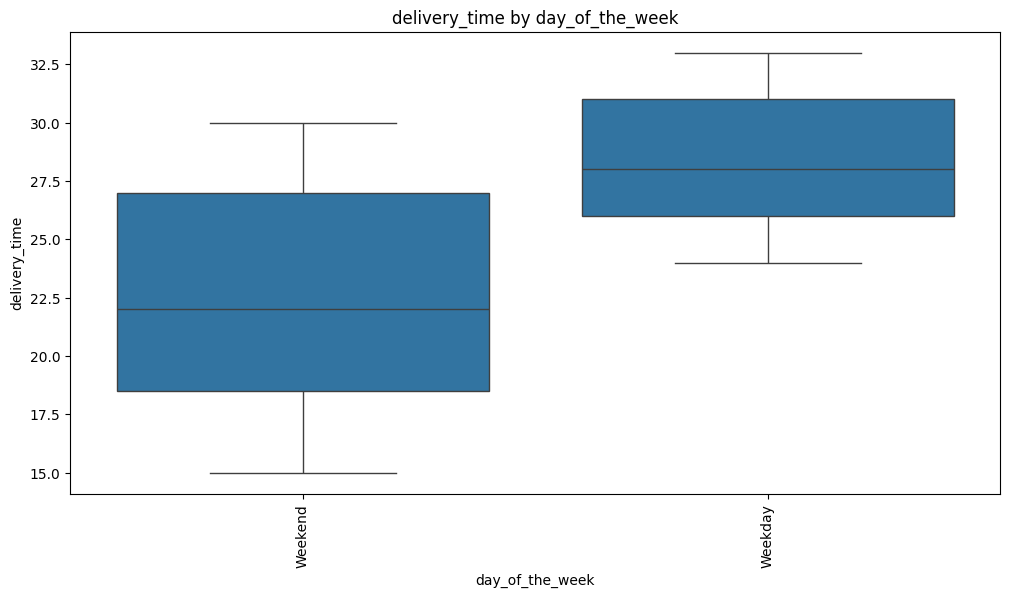

In [28]:
# Explore relationships between categorical and numerical variables using boxplots

# Categorical columns to explore
categorical_cols = ['cuisine_type', 'day_of_the_week'] # Exclude restaurant_name and rating for clearer plots

# Numerical columns to explore relationships with
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

for cat_col in categorical_cols:
  for num_col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=cat_col, y=num_col)
    plt.xticks(rotation=90)
    plt.title(f'{num_col} by {cat_col}')
    plt.show()

In [29]:
# Number of orders of Korean cuisine
print('Number of orders of Korean cuisine:', data[data['cuisine_type'] == 'Korean'].shape[0])
print('Number of orders of Vietnamese cuisine:', data[data['cuisine_type'] == 'Vietnamese'].shape[0])
print('Number of orders:', data.shape[0])

Number of orders of Korean cuisine: 13
Number of orders of Vietnamese cuisine: 7
Number of orders: 1898


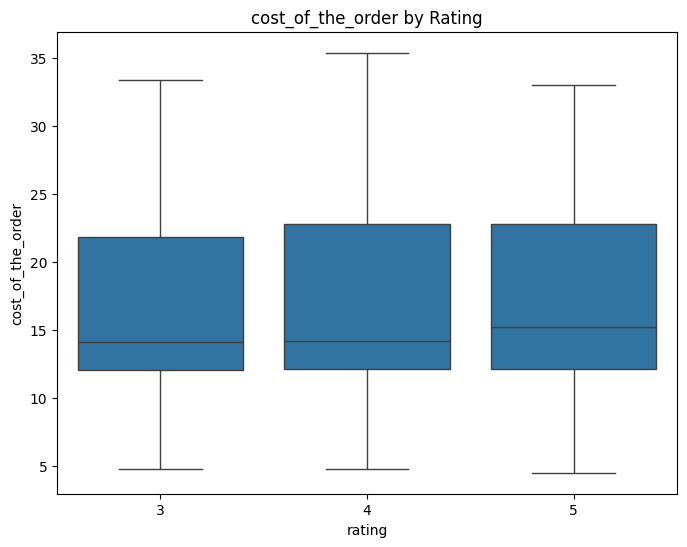

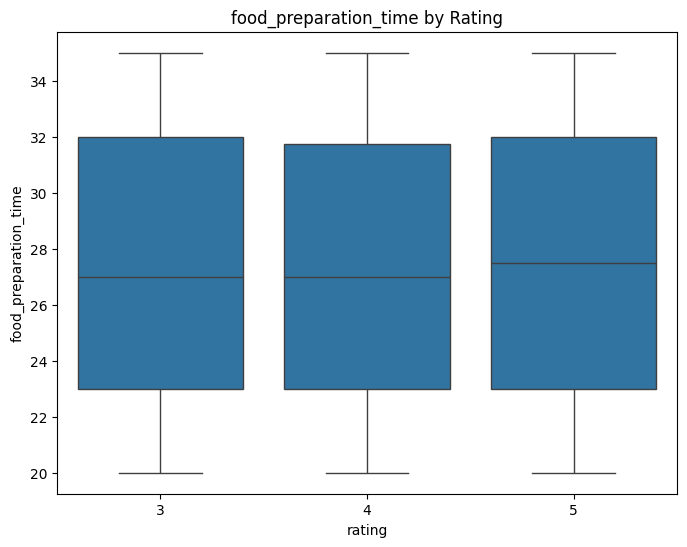

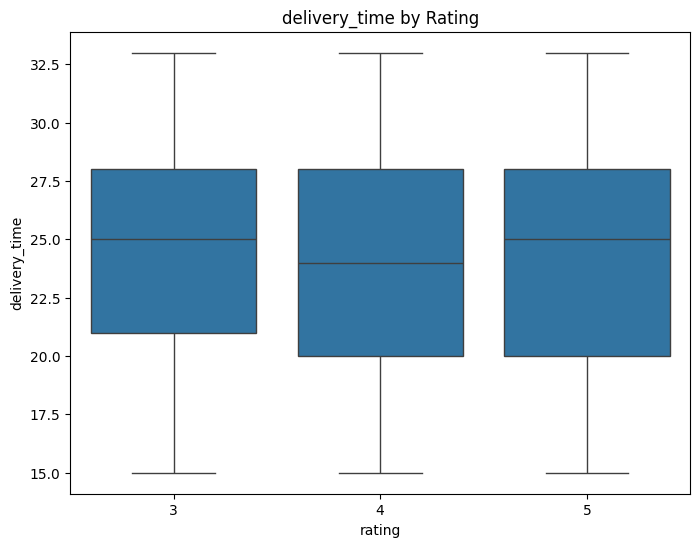

In [30]:
# Special handling for rating vs numerical columns using the data_with_rating
# since the main data DataFrame no longer has the rating column
if 'data_with_ratings' in globals() and not data_with_ratings.empty:
  numerical_cols_with_ratings = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
  for num_col in numerical_cols_with_ratings:
      plt.figure(figsize=(8, 6))
      sns.boxplot(data=data_with_ratings[data_with_ratings['rating'] != 'Not given'], x='rating', y=num_col)
      plt.title(f'{num_col} by Rating')
      plt.show()

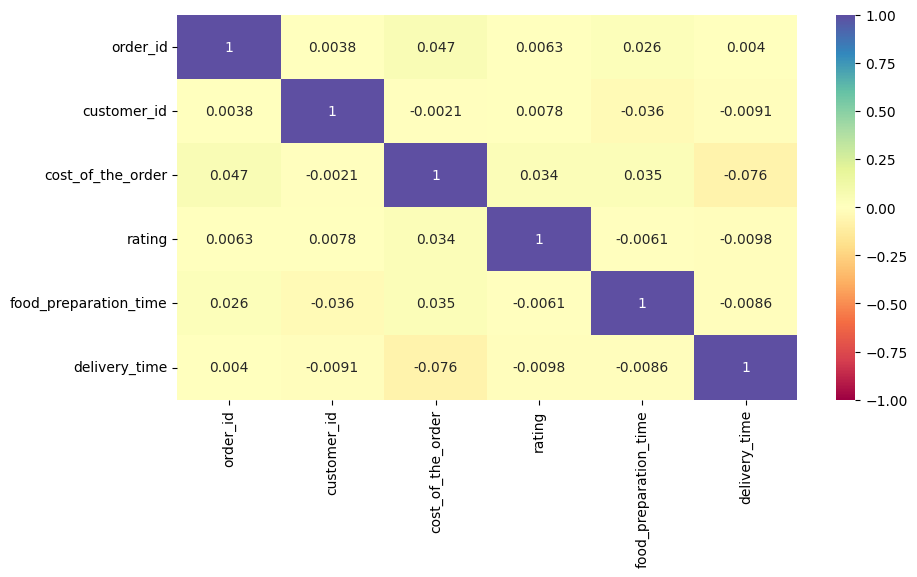

In [31]:
# Correlation of numerical columns in data_with_rating with the rating values
if 'data_with_ratings' in globals() and not data_with_ratings.empty:
  plt.figure(figsize=(10,5))
  sns.heatmap(data_with_ratings.select_dtypes(include=np.number).corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
  plt.show()

In [49]:
# Compare rating values over different cuisine types and weekend versus weekday, using statistical tables
if 'data_with_ratings' in globals() and not data_with_ratings.empty:
  print(data_with_ratings.groupby(['cuisine_type', 'day_of_the_week'])['rating'].describe())

                                count      mean       std  min   25%  50%  \
cuisine_type   day_of_the_week                                              
American       Weekday          111.0  4.252252  0.756409  3.0  4.00  4.0   
               Weekend          257.0  4.319066  0.744345  3.0  4.00  4.0   
Chinese        Weekday           26.0  4.230769  0.815239  3.0  4.00  4.0   
               Weekend          107.0  4.364486  0.757261  3.0  4.00  5.0   
French         Weekday            2.0  4.500000  0.707107  4.0  4.25  4.5   
               Weekend            8.0  4.250000  0.886405  3.0  3.75  4.5   
Indian         Weekday           14.0  4.428571  0.851631  3.0  4.00  5.0   
               Weekend           36.0  4.583333  0.603561  3.0  4.00  5.0   
Italian        Weekday           62.0  4.403226  0.734617  3.0  4.00  5.0   
               Weekend          110.0  4.336364  0.757559  3.0  4.00  5.0   
Japanese       Weekday           74.0  4.364865  0.768816  3.0  4.00  5.0   

#### Observations:

> From here, it doesn't seem any of the numerical variables are correlated with each other

> Order cost, food preparation time, and delivery time vary widely among each individual cuisine type and among different cuisine types

> Korean and Vietnamese cuisune generally have noticeably lower order costs. Korean cuisine also has a noticeably lower delivery time than the other cuisine types. This and the previous trends with Korean cuisine are likely because Korean cuisine only makes up 13 of the 1898 orders in the dataset. Also, Vietnamese cuisine only makes up 7 of the 1898 orders in the dataset, and it's possible this causes the lower order costs for Korean and Vietnamese cuisine as these businesses try to ramp up their popularity

> Order cost and food preparation time don't vary with weekend or weekday, BUT delivery time is higher on weekdays than weekends. This is likely if fewer people are working restaurants delivery during weekdays than weekends, such as due to lower demand and worker availability during weekdays (such as if some workers are school or college students or work restaurants / deliveries as a secondary job)

> For data where a rating is given, rating doesn't seem to correlate much with numerical columns. The correlation heatmap confirms for the data with a given rating confirms this.

> Ratings don't seem to have a statistically significant variation from weekend to weekday (only noticeable where the cuisine types have very few orders), but there is some very slight variation based on cuisine types. Particularly, Indian cuisine seems to have slightly higher food ratings than non-Indian cuisine (based on the mean rating given).

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [32]:
# Get the restaurants with more than 50 ratings
rating_count = data_with_ratings['restaurant_name'].value_counts()
rating_count_over_50 = rating_count[rating_count > 50]

# Calculate the mean rating for restaurants with ratings
rating_average = data_with_ratings.groupby('restaurant_name')['rating'].mean()

# Filter for restaurants with average rating greater than 4
rating_average_over_4 = rating_average[rating_average > 4]

# Find restaurants that meet both criteria
rating_count_promotional = rating_count_over_50[rating_count_over_50.index.isin(rating_average_over_4.index)]

print("Restaurants fulfilling the criteria for the promotional offer:")
print(rating_count_promotional)

print("\nMean rating of these restaurants:")
print(rating_average_over_4[rating_average_over_4.index.isin(rating_count_promotional.index)])

Restaurants fulfilling the criteria for the promotional offer:
restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
Name: count, dtype: int64

Mean rating of these restaurants:
restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64


#### Observations:

> The qualified restaurants are: Shake Shack (133 ratings, avg rating ≈ 4.28); The Meatball Shop (84 ratings, avg rating ≈ 4.51); Blue Ribbon Sushi (73 ratings, avg rating ≈ 4.22); and Blue Ribbon Fried Chicken (64 ratings, avg rating ≈ 4.33)


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [33]:
# Write the code here
# Get the data where the cost of the order is between $5 and $20 and where it is greater than $20
cost_between_5_and_20 = data[(data['cost_of_the_order'] > 5) & (data['cost_of_the_order'] <= 20)]
cost_over_20 = data[data['cost_of_the_order'] > 20]

# Calculate the net revenue generated by the company
net_revenue = 0.15 * cost_between_5_and_20['cost_of_the_order'].sum() + 0.25 * cost_over_20['cost_of_the_order'].sum()
print('Net revenue generated by the company across all orders:', net_revenue)

Net revenue generated by the company across all orders: 6166.303


In [46]:
# Excluding cuisine types with very few orders compared to the rest of the cuisine types
cuisine_types_to_exclude = ['Southern', 'French', 'Thai', 'Vietnamese', 'Korean', 'Spanish']
modified_cost_between_5_and_20 = cost_between_5_and_20[~cost_between_5_and_20['cuisine_type'].isin(cuisine_types_to_exclude)]
modified_cost_over_20 = cost_over_20[~cost_over_20['cuisine_type'].isin(cuisine_types_to_exclude)]

# Calculate the net revenue generated by the company
print('Net revenue generated by the company across all orders (excluding cuisine types with very few orders):', 0.15 * modified_cost_between_5_and_20['cost_of_the_order'].sum() + 0.2 * modified_cost_over_20['cost_of_the_order'].sum())

Net revenue generated by the company across all orders (excluding cuisine types with very few orders): 5152.701000000001


#### Observations:

> ** The net revenue in this case for the company across all orders will be approximately \$6166.30 **

> Excluding the 6 least-ordered cuisine types, this will be approximately \$5152.70


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [34]:
# Write the code here
print('Percentage of orders that take more than 60 minutes to get delivered:', f"{100*data[data['food_preparation_time'] + data['delivery_time'] > 60].shape[0] / data.shape[0]}%")

Percentage of orders that take more than 60 minutes to get delivered: 10.53740779768177%


#### Observations:

> The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is: approximately 10.537%


In [42]:
# Analyze this by cuisine type
total_orders_by_cuisine = data.groupby('cuisine_type').size()
orders_over_60_by_cuisine = data[data['food_preparation_time'] + data['delivery_time'] > 60].groupby('cuisine_type').size()

# Calculate the percentage, handling cases where there are no orders over 60 minutes
percentage_over_60_by_cuisine = (orders_over_60_by_cuisine / total_orders_by_cuisine) * 100

# Fill NaN values with 0 for cuisine types with no orders over 60 minutes
percentage_over_60_by_cuisine = percentage_over_60_by_cuisine.fillna(0)

print(percentage_over_60_by_cuisine)

cuisine_type
American           9.417808
Chinese           14.418605
French            11.111111
Indian             8.219178
Italian           11.409396
Japanese          11.702128
Korean             0.000000
Mediterranean     10.869565
Mexican            6.493506
Middle Eastern     4.081633
Southern          11.764706
Spanish           16.666667
Thai               5.263158
Vietnamese         0.000000
dtype: float64


#### Observations (self note)
> Spanish and Chinese cuisine were typically more likely to have total preparation plus delivery time of over 60 minutes, while Middle Eastern, Thai, and Mexican have a very low likelihood of this.
> Korean and Vietnamese cuisine have never taken over 60 minutes to prepare and deliver in this dataset.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [35]:
# Write the code here
print('Mean delivery time during weekdays:', data[data['day_of_the_week'] != 'Weekend']['delivery_time'].mean())
print('Mean delivery time during weekends:', data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean())

Mean delivery time during weekdays: 28.340036563071298
Mean delivery time during weekends: 22.4700222057735


#### Observations:

> The mean delivery time during weekdays is ≈28.34 minutes and during weekends is ≈22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  None of the numerical columns have any outlier values
* 736 of the 1898 orders are not rated
* 50 of the 178 restaurants in this list have only 1 order, there are 109 with fewer than 5 orders, and 137 with fewer than 10 orders
* The 4 most popular cuisine types (from most to least popular) are: American, Japanese, Italian, and Chinese. The next most popular is Mexican with less than 1/3 of Chinese orders on weekends and less than 1/2 on weekdays
* Korean and Vietnamese cuisine have very few orders compared to the other cuisine types.
* Also, Korean and Vietnamese cuisune generally have noticeably lower order costs. Korean cuisine also has a noticeably lower delivery time than the other cuisine types. These trends along with the low order numbers could make sense if Korean / Vietnamese cuisine businesses try to ramp up their popularity
* Around 29.24\% of orders cost more than \$20, and around 16.07\% cost more than \$25
* It doesn't seem any of the numerical features are significantly correlated with each other
* Order cost, food preparation time, and delivery time vary widely among each individual cuisine type and among different cuisine types
* 1351 orders were on weekends, which is nearly 2.5x the 547 orders on weekdays
* Order cost and food preparation time don't vary with being a weekend or weekday, BUT delivery time is higher on weekdays than weekends. It is approximately 28.34 minutes for weekdays, compared to approximately 22.47 minutes for weekends

* Spanish and Chinese cuisine were typically more likely to have total preparation plus delivery time of over 60 minutes, while Middle Eastern, Thai, and Mexican have a very low likelihood of this.
* Korean and Vietnamese cuisine have never taken over 60 minutes to prepare and deliver in this dataset.
*  For data where rating is given, the mean rating doesn't seem to vary too much based on cuisine type or weekend vs weekday, BUT Indian cuisine seems to have a slightly higher mean rating and there are plenty of cuisine types with too few samples to draw statistically significant conclusions from

### Recommendations:
*  The order cost and food preparation time don't vary much with weekend versus weekday, BUT
We might want to have more delivery drivers on weekdays so that the delivery time isn't significantly higher on weekdays versus weekends.
*  Most of these restaurants have very few orders, and there are definitely more than 178 restaurants in New York, so we should try to add more popular restaurants (including multiple store locations in popular businesses like Shake Shack) to our app to further increase our revenue
* Korean and Vietnamese cuisine seems to be trying to increase in popularity, so we should charge lower commission on those cuisine types so those business can grow more quickly and efficiently. However, excluding all our 6 least-ordered cuisine types from our commission would make us lose a significant portion of our revenue.
* In order to gain more data on ratings, we might want to give a slight incentive for customers to rate their orders. In this case, all we ask for is a rating on a scale of 5, so potentially reminding customers to do it or giving a very slight financial incentive could gather some more ratings.
* We might want to try promoting our more infrequent cuisine types so those cuisines get more orders


---